In [99]:
import csv
import requests
from bs4 import BeautifulSoup


def scrape_data(url):

    response = requests.get(url, timeout=10)
    soup = BeautifulSoup(response.content, 'html.parser')

    table = soup.find_all('table')[1]

    rows = table.select('tbody>tr')

   
    header = ['Districts','Confirmed','Deaths','Recovered','Readmitted']
   

    with open('records.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(header)
        for row in rows:
            data = [th.text.strip() for th in row.find_all('td')]
            writer.writerow(data)
            

            
if __name__=="__main__":
    url = "https://kathmandupost.com/covid19"
    scrape_data(url)

In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
pd.set_option('display.max_rows', None)
import datetime
from plotly.subplots import make_subplots

import folium
from folium import plugins

from scipy.interpolate import interp1d
import plotly.express as px

In [7]:
corona = pd.read_csv('records.csv')
# corona = corona.drop(['Longitude','Latitude'],axis=1)
corona

Districts  Confirmed  Deaths  Recovered  Readmitted
0           Rautahat       1362       1        370           1
1            Dailekh        776       2        308           0
2         Kapilvastu        745       0         41           0
3          Mahottari        650       0         79           0
4            Sarlahi        649       0        211           0
5               Dang        590       1         89           0
6            Kailali        574       4         34           0
7              Palpa        498       1          1           0
8               Doti        397       0         10           0
9             Bajura        392       1          0           0
10           Dhanusa        370       0        219           0
11           Surkhet        369       1         86           0
12             Banke        359       2        360           0
13             Gulmi        330       3         21           0
14      Arghakhanchi        315       2          2           0
15         Rupandehi        312       0         56           0
16        Kanchanpur        305       0          7           0
17           Pyuthan        304       0          1           0
18  Nawalparasi East        236       0         10           0
19        Dadeldhura        226       0          8           0
20           Saptari        224       0         98           0
21             Jhapa        218       0        176           0
22           Baitadi        212       0          5           0
23           Baglung        194       0         13           0
24            Salyan        193       0         48           0
25           Syangja        187       2         51           0
26            Siraha        170       0         86           0
27           Bardiya        164       0         11           0
28             Parsa        162       1        186           1
29            Morang        155       0         78           0
30            Achham        135       0          7           0
31           Dhading        129       0         20           0
32              Bara        126       2         65           0
33           Tanahun        118       0         14           0
34            Gorkha         93       0         10           0
35  Nawalparasi West         90       0          3           0
36            Parbat         85       0          9           0
37           Sunsari         85       0         52           0
38           Bajhang         79       0          1           0
39          Udayapur         68       0         38           0
40           Chitwan         67       1         26           0
41         Kathmandu         59       0         25           2
42           Kalikot         49       0         52           0
43             Rolpa         48       0          0           0
44             Kaski         41       0         20           0
45             Jumla         38       0         24           0
46    Sindhupalchowk         29       1          0           0
47         Ramechhap         28       0         16           0
48         Bhaktapur         23       0          5           0
49           Lamjung         20       0          1           0
50           Nuwakot         20       0          9           0
51            Myagdi         18       0          5           0
52          Darchula         17       0          3           0
53         Makwanpur         17       0         11           0
54          Jajarkot         13       0          0           0
55          Sindhuli         11       0          4           0
56             Illam         10       0          2           0
57           Khotang         10       0          4           0
58          Dhankuta          9       0          7           0
59          Lalitpur          9       2          1           0
60            Rasuwa          9       0          0           0
61   Kavrepalanchowk          7       0          6           0
62         Taplejung          7       0   

In [8]:
corona['Active']=corona['Confirmed']-(corona['Recovered']+corona['Deaths'])
corona

Districts  Confirmed  Deaths  Recovered  Readmitted  Active
0           Rautahat       1362       1        370           1     991
1            Dailekh        776       2        308           0     466
2         Kapilvastu        745       0         41           0     704
3          Mahottari        650       0         79           0     571
4            Sarlahi        649       0        211           0     438
5               Dang        590       1         89           0     500
6            Kailali        574       4         34           0     536
7              Palpa        498       1          1           0     496
8               Doti        397       0         10           0     387
9             Bajura        392       1          0           0     391
10           Dhanusa        370       0        219           0     151
11           Surkhet        369       1         86           0     282
12             Banke        359       2        360           0      -3
13             Gulmi        330       3         21           0     306
14      Arghakhanchi        315       2          2           0     311
15         Rupandehi        312       0         56           0     256
16        Kanchanpur        305       0          7           0     298
17           Pyuthan        304       0          1           0     303
18  Nawalparasi East        236       0         10           0     226
19        Dadeldhura        226       0          8           0     218
20           Saptari        224       0         98           0     126
21             Jhapa        218       0        176           0      42
22           Baitadi        212       0          5           0     207
23           Baglung        194       0         13           0     181
24            Salyan        193       0         48           0     145
25           Syangja        187       2         51           0     134
26            Siraha        170       0         86           0      84
27           Bardiya        164       0         11           0     153
28             Parsa        162       1        186           1     -25
29            Morang        155       0         78           0      77
30            Achham        135       0          7           0     128
31           Dhading        129       0         20           0     109
32              Bara        126       2         65           0      59
33           Tanahun        118       0         14           0     104
34            Gorkha         93       0         10           0      83
35  Nawalparasi West         90       0          3           0      87
36            Parbat         85       0          9           0      76
37           Sunsari         85       0         52           0      33
38           Bajhang         79       0          1           0      78
39          Udayapur         68       0         38           0      30
40           Chitwan         67       1         26           0      40
41         Kathmandu         59       0         25           2      34
42           Kalikot         49       0         52           0      -3
43             Rolpa         48       0          0           0      48
44             Kaski         41       0         20           0      21
45             Jumla         38       0         24           0      14
46    Sindhupalchowk         29       1          0           0      28
47         Ramechhap         28       0         16           0      12
48         Bhaktapur         23       0          5           0      18
49           Lamjung         20       0          1           0      19
50           Nuwakot         20       0          9           0      11
51            Myagdi         18       0          5           0      13
52          Darchula         17       0          3           0      14
53         Makwanpur         17       0         11           0       6
54          Jajarkot         13       0          0           0      13
55          Sindhuli         11    

In [9]:
pyo.iplot([{
    'x' : corona.Districts,
    'y' : corona.Confirmed
}])

In [10]:
corona.loc[corona['Districts']=='Rasuwa']

Districts  Confirmed  Deaths  Recovered  Readmitted  Active
60    Rasuwa          9       0          0           0       9

In [11]:
corona.loc[corona['Districts'] == 'Kathmandu']

Districts  Confirmed  Deaths  Recovered  Readmitted  Active
41  Kathmandu         59       0         25           2      34

In [12]:
corona.loc[corona['Districts']=='Tanahun']

Districts  Confirmed  Deaths  Recovered  Readmitted  Active
33   Tanahun        118       0         14           0     104

In [13]:
corona.loc[corona['Districts']=='Kaski']

Districts  Confirmed  Deaths  Recovered  Readmitted  Active
44     Kaski         41       0         20           0      21

In [14]:
current_status = {'Total confirmed':sum(corona['Confirmed']),
                  'Total Deaths':sum(corona['Deaths']),
                  'Total Recovered':sum(corona['Recovered']),
                  'Active Cases': sum(corona['Active']),
                  'Readmitted': sum(corona['Readmitted'])
    
                }

In [15]:
current_status

{'Total confirmed': 13248,
 'Total Deaths': 29,
 'Total Recovered': 3130,
 'Active Cases': 10089,
 'Readmitted': 4}

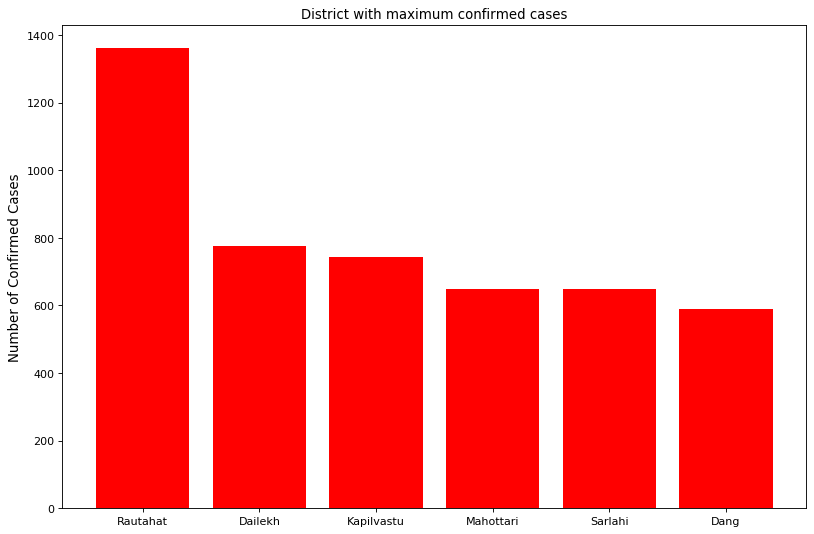

In [16]:
corona_latest = corona.sort_values(by=['Confirmed'], ascending=False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(corona_latest['Districts'][:6], corona_latest['Confirmed'][:6], align='center', color='red')
plt.ylabel('Number of Confirmed Cases', size=12)
plt.title('District with maximum confirmed cases', size=12)
plt.show()

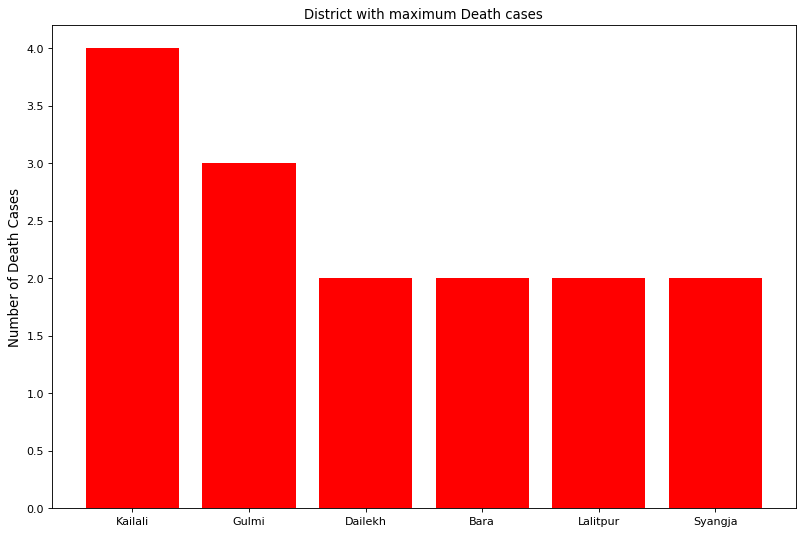

In [17]:
corona_latest = corona.sort_values(by=['Deaths'], ascending=False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(corona_latest['Districts'][:6], corona_latest['Deaths'][:6], align='center', color='red')
plt.ylabel('Number of Death Cases', size=12)
plt.title('District with maximum Death cases', size=12)
plt.show()

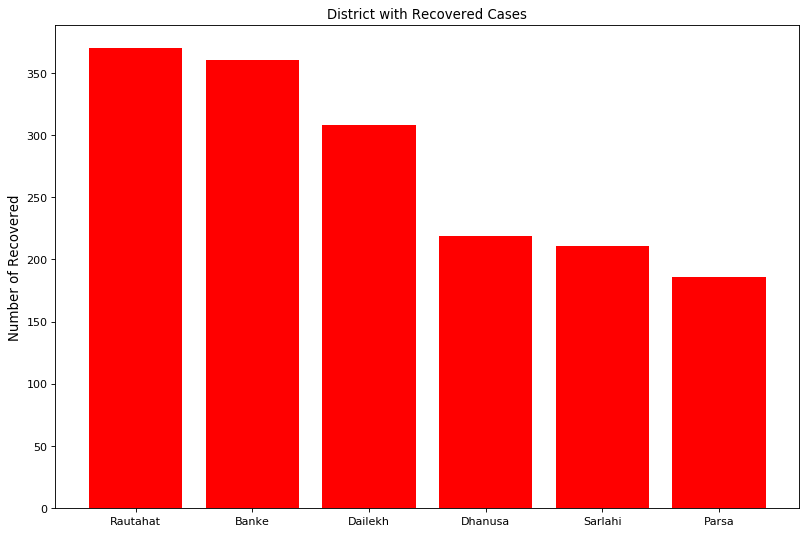

In [18]:
corona_latest = corona.sort_values(by=['Recovered'], ascending=False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(corona_latest['Districts'][:6], corona_latest['Recovered'][:6], align='center', color='red')
plt.ylabel('Number of Recovered', size=12)
plt.title('District with Recovered Cases', size=12)
plt.show()

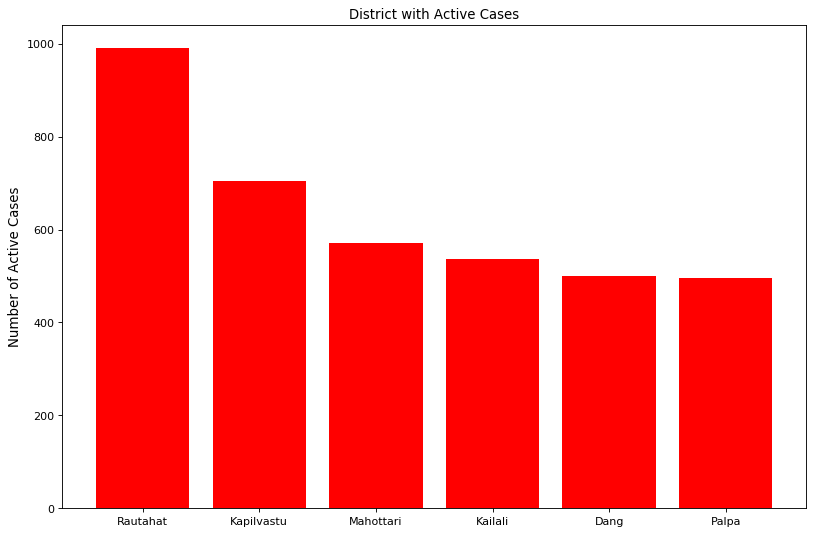

In [19]:
corona_latest = corona.sort_values(by=['Active'], ascending=False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(corona_latest['Districts'][:6], corona_latest['Active'][:6], align='center', color='red')
plt.ylabel('Number of Active Cases', size=12)
plt.title('District with Active Cases', size=12)
plt.show()

In [20]:
coordinate = pd.read_csv('Districts-Coordinate.csv')
coordinate

Districts  Longitude  Latitude
0           Achham    81.2519   29.0396
1     Arghakhanchi    83.0361   27.9829
2          Baglung    83.2201   28.3491
3          Baitadi    80.4688   29.5186
4          Bajhang    81.2519   29.7767
5           Bajura    81.6035   29.6155
6            Banke    81.7787   28.1461
7             Bara    85.0649   27.1341
8          Bardiya    81.4279   28.3102
9        Bhaktapur    85.4298   27.6710
10         Bhojpur    87.0524   27.1780
11         Chitwan    84.3542   27.5291
12      Dadeldhura    80.4994   29.2188
13         Dailekh    81.6473   28.9262
14            Dang    82.3018   27.9904
15        Darchula    80.7948   29.9038
16         Dhading    84.8985   27.9711
17        Dhankuta    87.3215   26.9835
18         Dhanusa    86.0122   26.8350
19         Dolakha    86.1752   27.7784
20           Dolpa    83.0791   29.0539
21            Doti    80.8987   29.2006
22          Gorkha    84.7925   28.2512
23           Gulmi    83.2934   28.0889
24           Humla    81.9535   30.0052
25            Ilam    87.9335   26.8760
26        Jajarkot    82.1558   28.8615
27           Jhapa    87.8942   26.6398
28           Jumla    82.1278   29.2788
29         Kailali    80.8092   28.7413
30         Kalikot    81.7349   29.2089
31      Kanchanpur    80.3213   28.8372
32      Kapilbastu    83.0469   27.5518
33           Kaski    84.0167   28.2622
34       Kathmandu    85.3240   27.7172
35  Kavrepalanchok    85.5612   27.5259
36         Khotang    86.8220   27.2317
37        Lalitpur    85.3225   27.6580
38         Lamjung    84.3542   28.2765
39       Mahottari    85.8077   26.8762
40       Makwanpur    85.0233   27.5546
41          Manang    84.2308   28.6918
42          Morang    87.4604   26.6799
43            Mugu    82.3466   29.6141
44         Mustang    83.8473   28.9985
45          Myagdi    83.3362   28.6029
46  Nawalparasi(E)    84.0331   27.6568
47  Nawalparasi(W)    83.6665   27.5328
48         Nuwakot    85.1661   27.9194
49     Okhaldhunga    86.5047   27.3240
50           Palpa    83.6348   27.8253
51       Panchthar    87.7781   27.1044
52          Parbat    83.6987   28.1780
53           Parsa    84.8568   27.1736
54         Pyuthan    82.8533   28.1017
55       Ramechhap    86.1345   27.3554
56          Rasuwa    85.3136   28.1727
57        Rautahat    85.3136   27.0487
58           Rolpa    82.6483   28.3816
59        Rukum(E)    82.8548   28.6641
60        Rukum(W)    82.4359   28.7436
61       Rupandehi    83.4463   27.5924
62          Salyan    82.1278   28.3525
63   Sankhuwasabha    87.1423   27.6142
64         Saptari    86.7014   26.6173
65         Sarlahi    85.5612   26.9627
66        Sindhuli    85.9713   27.2569
67   Sindhupalchok    85.6846   27.9512
68          Siraha    86.3525   26.7333
69      Solukhumbu    86.6611   27.7910
70         Sunsari    87.1822   26.6276
71         Surkhet    81.7787   28.5175
72         Syangja    83.8049   28.0197
73         Tanahun    84.2279   27.9447
74       Taplejung    87.7763   27.6257
75       Terhathum    87.5377   27.1508
76        Udayapur    86.7014   26.8998

In [21]:
corona.style.background_gradient(cmap='Reds')

In [22]:
COVID19= pd.merge(corona,coordinate,on="Districts")
COVID19

Districts  Confirmed  Deaths  Recovered  Readmitted  Active  \
0        Rautahat       1362       1        370           1     991   
1         Dailekh        776       2        308           0     466   
2       Mahottari        650       0         79           0     571   
3         Sarlahi        649       0        211           0     438   
4            Dang        590       1         89           0     500   
5         Kailali        574       4         34           0     536   
6           Palpa        498       1          1           0     496   
7            Doti        397       0         10           0     387   
8          Bajura        392       1          0           0     391   
9         Dhanusa        370       0        219           0     151   
10        Surkhet        369       1         86           0     282   
11          Banke        359       2        360           0      -3   
12          Gulmi        330       3         21           0     306   
13   Arghakhanchi        315       2          2           0     311   
14      Rupandehi        312       0         56           0     256   
15     Kanchanpur        305       0          7           0     298   
16        Pyuthan        304       0          1           0     303   
17     Dadeldhura        226       0          8           0     218   
18        Saptari        224       0         98           0     126   
19          Jhapa        218       0        176           0      42   
20        Baitadi        212       0          5           0     207   
21        Baglung        194       0         13           0     181   
22         Salyan        193       0         48           0     145   
23        Syangja        187       2         51           0     134   
24         Siraha        170       0         86           0      84   
25        Bardiya        164       0         11           0     153   
26          Parsa        162       1        186           1     -25   
27         Morang        155       0         78           0      77   
28         Achham        135       0          7           0     128   
29        Dhading        129       0         20           0     109   
30           Bara        126       2         65           0      59   
31        Tanahun        118       0         14           0     104   
32         Gorkha         93       0         10           0      83   
33         Parbat         85       0          9           0      76   
34        Sunsari         85       0         52           0      33   
35        Bajhang         79       0          1           0      78   
36       Udayapur         68       0         38           0      30   
37        Chitwan         67       1         26           0      40   
38      Kathmandu         59       0         25           2      34   
39        Kalikot         49       0         52           0      -3   
40          Rolpa         48       0          0           0      48   
41          Kaski         41       0         20           0      21   
42          Jumla         38       0         24           0      14   
43      Ramechhap         28       0         16           0      12   
44      Bhaktapur         23       0          5           0      18   
45        Lamjung         20       0          1           0      19   
46        Nuwakot         20       0          9           0      11   
47         Myagdi         18       0          5           0      13   
48       Darchula         17       0          3           0      14   
49      Makwanpur         17       0         11           0       6   
50       Jajarkot         13       0          0           0      13   
51       Sindhuli         11       0          4           0       7   
52        Khotang         10       0          4           0       6   
53       Dhankuta          9       0          7           0       2   
54       Lalitpur          9       2          1           0       6   
55         Rasuwa          9    

In [23]:
list1 = corona.Confirmed.tolist()

m=interp1d([0,max(list1)],[5,18])

circle_radius = m(list1)

typelist=['open-street-map','white-bg','carto-positron','stamen-terrain','stamen-toner','stamen-watercolor']

for i in typelist:
    print(i)
    fig=px.density_mapbox(COVID19, lat='Latitude', lon='Longitude',hover_name='Districts', radius=circle_radius, zoom=6,title='COVID-19 map of Nepal', mapbox_style=i)
    fig.show()

open-street-map


white-bg


carto-positron


stamen-terrain


stamen-toner


stamen-watercolor


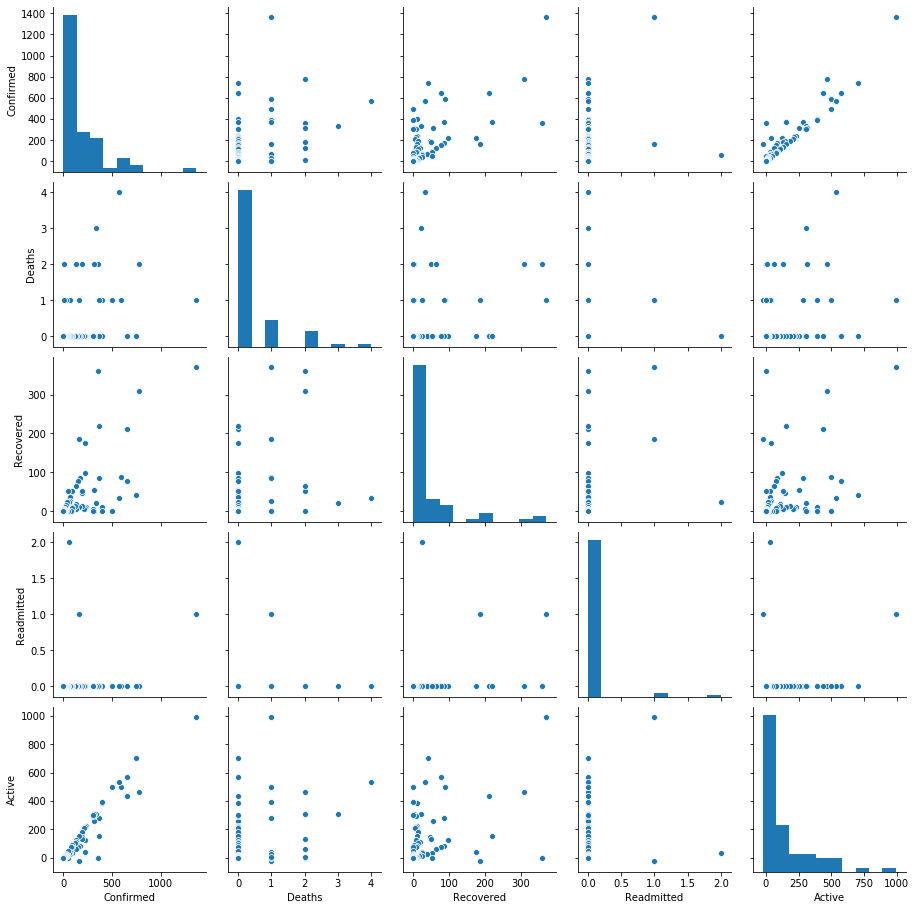

In [24]:
sns.pairplot(corona)

D:\installed-apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



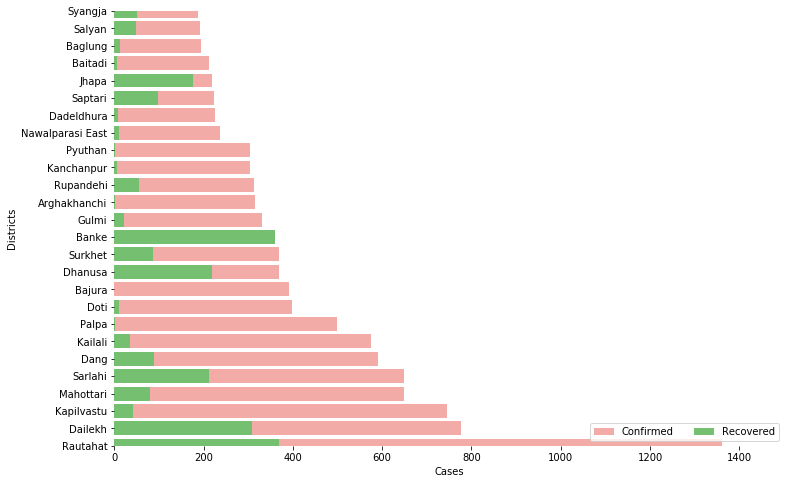

In [25]:
f, ax = plt.subplots(figsize=(12, 8))
data = corona[['Districts','Confirmed','Recovered','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Districts", data=corona,label="Confirmed", color="r")
sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Districts", data=corona, label="Recovered", color="g")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1500),ylim=(0,25), ylabel="Districts",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [26]:
fig = go.Figure(data=[go.Bar(
            x=corona['Districts'][0:10], y=corona['Confirmed'][0:10],
            text=corona['Confirmed'][0:10],
            textposition='auto',
            marker_color='blue',
            

        )])
fig.update_layout(
    title='Ten most infected Districts of Nepal',
    xaxis_title="Districts",
    yaxis_title="Confirmed Cases",
        template='plotly_dark'

)
fig.show()

In [27]:
Readmitted_per_district = corona.groupby(["Districts"])["Readmitted"].sum().reset_index().sort_values("Readmitted",ascending=False).reset_index(drop=True)

In [28]:
fig = go.Figure(data=[go.Bar(
            x=Readmitted_per_district['Districts'][0:6], y=Readmitted_per_district['Readmitted'][0:6],
            text=Readmitted_per_district['Readmitted'][0:6],
            textposition='auto',
            marker_color='darkviolet'

        )])
fig.update_layout(
    title='10 Most Readmitted districts',
    xaxis_title="Districts",
    yaxis_title="Readmitted",
        template='plotly_dark'

)
fig.show()

In [29]:
fig = go.Figure(data=[go.Scatter(
    x=corona['Districts'][0:10],
    y=corona['Confirmed'][0:10],
    mode='markers',
    
    marker=dict(
        color=100+np.random.randn(500),
        size=(corona['Confirmed'][0:10]/10),
        showscale=True
        )
)])

fig.update_layout(
    title='10 Most infected Districts of Nepal',
    xaxis_title="Districts",
    yaxis_title="Confirmed Cases",
    template='plotly_dark'
)
fig.show()

In [30]:
Recovered_per_districts = corona.groupby(["Districts"])["Recovered"].sum().reset_index().sort_values("Recovered",ascending=False).reset_index(drop=True)

In [31]:
fig = go.Figure(data=[go.Bar(
            x=Recovered_per_districts['Districts'][0:10], y=Recovered_per_districts['Recovered'][0:10],
            text=Recovered_per_districts['Recovered'][0:10],
            textposition='auto',
            marker_color='red',

        )])
fig.update_layout(
    title='10 Most Recovered Districts',
    xaxis_title="Districts",
    yaxis_title="Recovered Cases",
    template='plotly_dark'
)
fig.show()

In [32]:
Active_per_district= corona.groupby(["Districts"])["Active"].sum().reset_index().sort_values("Active",ascending=False).reset_index(drop=True)

In [33]:
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Districts</b>','<b>Active Cases</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      Active_per_district['Districts'],
      Active_per_district['Active'],
      ],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*len(corona)],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])
fig.update_layout(
    title='Active Cases In Each Districts',
    template='plotly_dark'
)
fig.show()

In [34]:
fig = go.Figure(data=[go.Bar(
            x=Active_per_district['Districts'][0:10], y=Active_per_district['Active'][0:10],
            text=Active_per_district['Active'][0:10],
            marker_color='yellow',
           
        )])
fig.update_layout(
    title='10 Most Active Cases Districts',
    xaxis_title="Districts",
    yaxis_title="Active Cases",
    template='plotly_dark'
)
fig.show()

In [35]:
Deaths_per_district = corona.groupby(["Districts"])["Deaths"].sum().reset_index().sort_values("Deaths",ascending=False).reset_index(drop=True)

In [36]:
fig = go.Figure(data=[go.Bar(
            x=Deaths_per_district['Districts'][0:10], y=Deaths_per_district['Deaths'][0:10],
            text=Deaths_per_district['Deaths'][0:10],
            textposition='auto',
            marker_color='darkviolet'

        )])
fig.update_layout(
    title='10 Most death districts',
    xaxis_title="Districts",
    yaxis_title="Deaths",
        template='plotly_dark'

)
fig.show()

In [37]:
fig = px.pie(corona, values=corona['Confirmed'], 
             names=corona['Districts'],
             title='Conformed cases',
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    template='plotly_dark'
)
fig.show()

In [38]:
Recovered_per_districts = corona.groupby(["Districts"])["Recovered"].sum().reset_index().sort_values("Recovered",ascending=False).reset_index(drop=True)

In [39]:
fig = px.pie(Recovered_per_districts, values=Recovered_per_districts['Recovered'], 
             names=Recovered_per_districts['Districts'],
             title='Recovered cases',
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    template='plotly_dark'
)
fig.show()

#Time series analyis

In [40]:
import io

url="https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv"
s=requests.get(url).content
time_series_data = pd.read_csv(io.StringIO(s.decode('utf-8')))
time_series_data.head()

Date Country/Region Province/State   Lat  Long  Confirmed  Recovered  \
0  2020-01-22    Afghanistan            NaN  33.0  65.0        0.0        0.0   
1  2020-01-23    Afghanistan            NaN  33.0  65.0        0.0        0.0   
2  2020-01-24    Afghanistan            NaN  33.0  65.0        0.0        0.0   
3  2020-01-25    Afghanistan            NaN  33.0  65.0        0.0        0.0   
4  2020-01-26    Afghanistan            NaN  33.0  65.0        0.0        0.0   

   Deaths  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [41]:
Data_Nepal = time_series_data[(time_series_data['Country/Region'] == 'Nepal') ].reset_index(drop=True)
Data_Nepal.tail()

Date Country/Region Province/State      Lat   Long  Confirmed  \
154  2020-06-24          Nepal            NaN  28.1667  84.25    10728.0   
155  2020-06-25          Nepal            NaN  28.1667  84.25    11162.0   
156  2020-06-26          Nepal            NaN  28.1667  84.25    11755.0   
157  2020-06-27          Nepal            NaN  28.1667  84.25    12309.0   
158  2020-06-28          Nepal            NaN  28.1667  84.25    12772.0   

     Recovered  Deaths  
154     2338.0    24.0  
155     2650.0    26.0  
156     2698.0    27.0  
157     2834.0    28.0  
158     3013.0    28.0

In [42]:
Data_Nepal['Active'] = Data_Nepal['Confirmed']-(Data_Nepal['Recovered'] + Data_Nepal['Deaths'])

In [43]:
No_NAN = Data_Nepal.drop(columns=['Province/State'])
No_NAN

Date Country/Region      Lat   Long  Confirmed  Recovered  Deaths  \
0    2020-01-22          Nepal  28.1667  84.25        0.0        0.0     0.0   
1    2020-01-23          Nepal  28.1667  84.25        0.0        0.0     0.0   
2    2020-01-24          Nepal  28.1667  84.25        0.0        0.0     0.0   
3    2020-01-25          Nepal  28.1667  84.25        1.0        0.0     0.0   
4    2020-01-26          Nepal  28.1667  84.25        1.0        0.0     0.0   
5    2020-01-27          Nepal  28.1667  84.25        1.0        0.0     0.0   
6    2020-01-28          Nepal  28.1667  84.25        1.0        0.0     0.0   
7    2020-01-29          Nepal  28.1667  84.25        1.0        0.0     0.0   
8    2020-01-30          Nepal  28.1667  84.25        1.0        0.0     0.0   
9    2020-01-31          Nepal  28.1667  84.25        1.0        0.0     0.0   
10   2020-02-01          Nepal  28.1667  84.25        1.0        0.0     0.0   
11   2020-02-02          Nepal  28.1667  84.25        1.0        0.0     0.0   
12   2020-02-03          Nepal  28.1667  84.25        1.0        0.0     0.0   
13   2020-02-04          Nepal  28.1667  84.25        1.0        0.0     0.0   
14   2020-02-05          Nepal  28.1667  84.25        1.0        0.0     0.0   
15   2020-02-06          Nepal  28.1667  84.25        1.0        0.0     0.0   
16   2020-02-07          Nepal  28.1667  84.25        1.0        0.0     0.0   
17   2020-02-08          Nepal  28.1667  84.25        1.0        0.0     0.0   
18   2020-02-09          Nepal  28.1667  84.25        1.0        0.0     0.0   
19   2020-02-10          Nepal  28.1667  84.25        1.0        0.0     0.0   
20   2020-02-11          Nepal  28.1667  84.25        1.0        0.0     0.0   
21   2020-02-12          Nepal  28.1667  84.25        1.0        1.0     0.0   
22   2020-02-13          Nepal  28.1667  84.25        1.0        1.0     0.0   
23   2020-02-14          Nepal  28.1667  84.25        1.0        1.0     0.0   
24   2020-02-15          Nepal  28.1667  84.25        1.0        1.0     0.0   
25   2020-02-16          Nepal  28.1667  84.25        1.0        1.0     0.0   
26   2020-02-17          Nepal  28.1667  84.25        1.0        1.0     0.0   
27   2020-02-18          Nepal  28.1667  84.25        1.0        1.0     0.0   
28   2020-02-19          Nepal  28.1667  84.25        1.0        1.0     0.0   
29   2020-02-20          Nepal  28.1667  84.25        1.0        1.0     0.0   
30   2020-02-21          Nepal  28.1667  84.25        1.0        1.0     0.0   
31   2020-02-22          Nepal  28.1667  84.25        1.0        1.0     0.0   
32   2020-02-23          Nepal  28.1667  84.25        1.0        1.0     0.0   
33   2020-02-24          Nepal  28.1667  84.25        1.0        1.0     0.0   
34   2020-02-25          Nepal  28.1667  84.25        1.0        1.0     0.0   
35   2020-02-26          Nepal  28.1667  84.25        1.0        1.0     0.0   
36   2020-02-27          Nepal  28.1667  84.25        1.0        1.0     0.0   
37   2020-02-28          Nepal  28.1667  84.25        1.0        1.0     0.0   
38   2020-02-29          Nepal  28.1667  84.25        1.0        1.0     0.0   
39   2020-03-01          Nepal  28.1667  84.25        1.0        1.0     0.0   
40   2020-03-02          Nepal  28.1667  84.25        1.0        1.0     0.0   
41   2020-03-03          Nepal  28.1667  84.25        1.0        1.0     0.0   
42   2020-03-04          Nepal  28.1667  84.25        1.0        1.0     0.0   
43   2020-03-05          Nepal  28.1667  84.25        1.0        1.0     0.0   
44   2020-03-06          Nepal  28.1667  84.25        1.0        1.0     0.0   
45   2020-03-07          Nepal  28.1667  84.25        1.0        1.0     0.0   
46   2020-03-08          Nepal  28.1667  84.25        1.0        1.0     0.0   
47   2020-03-09          Nepal  28.1667  84.25        1.0        1.0     0.0   
48   2020-03-10          Nepal  28.1667  84.25        1.0        1.0     0.0   
49   2020-0

In [44]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Active'],
                    mode='lines',
                    marker_color='yellow',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Deaths'],name='Deaths',
                                   marker_color='red',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Evolution of cases over time in Nepal',
    template='plotly_dark',

)

fig.show()

In [45]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Nepal.Date, y=Data_Nepal['Confirmed'],
                    mode='markers',
                    name='Confirmed cases'))


fig.update_layout(
    title='Evolution of Confirmed cases over time in Nepal',
        template='plotly_dark'

)

fig.show()

In [46]:
fig = go.Figure()


fig.add_trace(go.Scatter(x=Data_Nepal.Date, y=Data_Nepal['Active'],
                    mode='lines',marker_color='yellow',
                    name='Active cases',line=dict( dash='dot')))

fig.update_layout(
    title='Evolution of Acitive cases over time in Nepal',
        template='plotly_dark'

)

fig.show()

In [47]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=Data_Nepal.Date, y=Data_Nepal['Deaths'],name='Deaths',
                                   marker_color='red',mode='lines',line=dict( dash='dot') ))

fig.update_layout(
    title='Evolution of Deaths over time in Nepal',
        template='plotly_dark'

)

fig.show()

Using fbprophet for Forecast

In [61]:
from fbprophet import Prophet

In [77]:
fb_data = Data_Nepal.copy()
fb_data.tail()

Date Country/Region Province/State      Lat   Long  Confirmed  \
154  2020-06-24          Nepal            NaN  28.1667  84.25    10728.0   
155  2020-06-25          Nepal            NaN  28.1667  84.25    11162.0   
156  2020-06-26          Nepal            NaN  28.1667  84.25    11755.0   
157  2020-06-27          Nepal            NaN  28.1667  84.25    12309.0   
158  2020-06-28          Nepal            NaN  28.1667  84.25    12772.0   

     Recovered  Deaths  Active  
154     2338.0    24.0  8366.0  
155     2650.0    26.0  8486.0  
156     2698.0    27.0  9030.0  
157     2834.0    28.0  9447.0  
158     3013.0    28.0  9731.0

In [92]:
confirmed = fb_data.groupby('Date').sum()['Confirmed'].reset_index()
death = fb_data.groupby('Date').sum()['Deaths'].reset_index()
recovered = fb_data.groupby('Date').sum()['Recovered'].reset_index()
active = fb_data.groupby('Date').sum()['Active'].reset_index()

#For Confirmed Cases


In [64]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [65]:
confirmed.tail()

ds        y
154 2020-06-24  10728.0
155 2020-06-25  11162.0
156 2020-06-26  11755.0
157 2020-06-27  12309.0
158 2020-06-28  12772.0

In [67]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
161 2020-07-01
162 2020-07-02
163 2020-07-03
164 2020-07-04
165 2020-07-05

In [71]:
#predicting the future with date,upper limit and lower limit of y value

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
161 2020-07-01  12531.324342  11980.957057  13143.447611
162 2020-07-02  12887.255205  12307.613104  13460.204741
163 2020-07-03  13248.873951  12661.196233  13859.099328
164 2020-07-04  13600.238840  12987.974893  14207.725876
165 2020-07-05  13949.934904  13332.082657  14561.719727

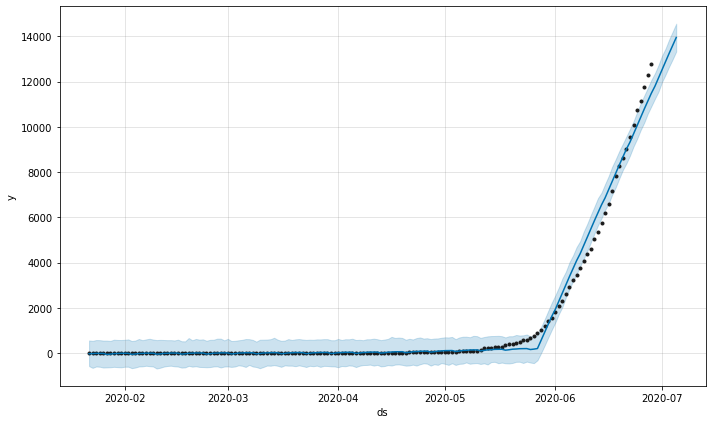

In [72]:
confirmed_forecast_plot = m.plot(forecast)

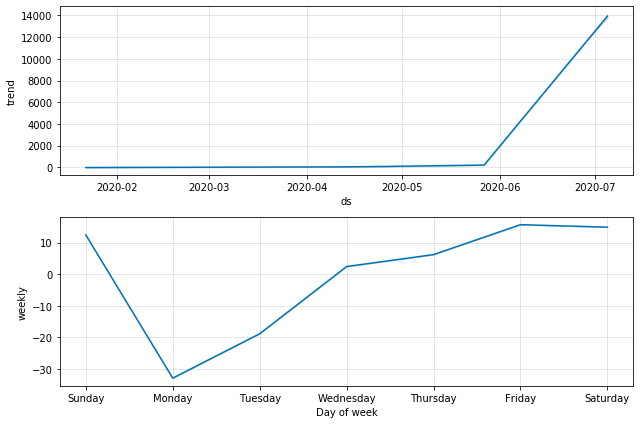

In [73]:
confirmed_forecast_plot = m.plot_components(forecast)

#For Death Cases

In [78]:
death.columns = ['ds','y']
death['ds'] = pd.to_datetime(death['ds'])

In [79]:
death.tail()

ds     y
154 2020-06-24  24.0
155 2020-06-25  26.0
156 2020-06-26  27.0
157 2020-06-27  28.0
158 2020-06-28  28.0

In [80]:
m = Prophet(interval_width=0.95)
m.fit(death)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
161 2020-07-01
162 2020-07-02
163 2020-07-03
164 2020-07-04
165 2020-07-05

In [81]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
161 2020-07-01  30.293500   29.705052   30.946408
162 2020-07-02  31.156108   30.533404   31.769416
163 2020-07-03  31.886037   31.228467   32.553836
164 2020-07-04  32.697237   31.971109   33.348193
165 2020-07-05  33.464945   32.736116   34.162643

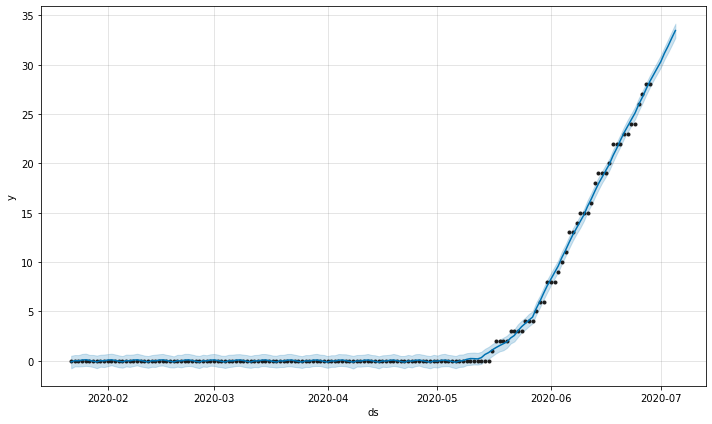

In [82]:
death_forecast_plot = m.plot(forecast)

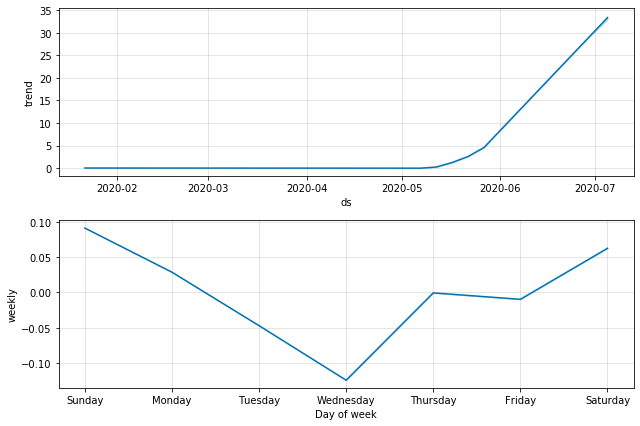

In [83]:
death_forecast_plot = m.plot_components(forecast)

#For Recovered Cases

In [84]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [86]:
recovered.tail()

ds       y
154 2020-06-24  2338.0
155 2020-06-25  2650.0
156 2020-06-26  2698.0
157 2020-06-27  2834.0
158 2020-06-28  3013.0

In [87]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
161 2020-07-01
162 2020-07-02
163 2020-07-03
164 2020-07-04
165 2020-07-05

In [88]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
161 2020-07-01  2284.976620  1933.478189  2629.327795
162 2020-07-02  2355.686423  2017.578050  2741.817755
163 2020-07-03  2419.091699  2067.322972  2746.877962
164 2020-07-04  2482.461011  2103.696645  2834.380001
165 2020-07-05  2553.047165  2221.026364  2919.642712

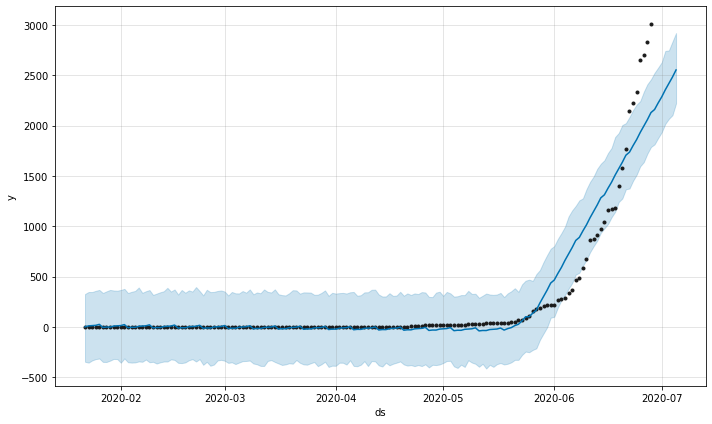

In [89]:
recovered_forecast_plot = m.plot(forecast)

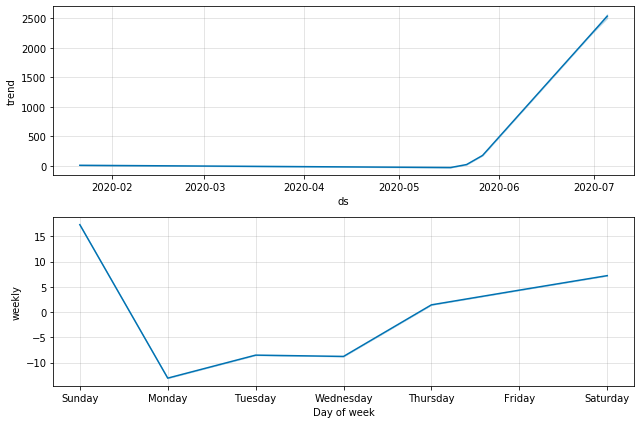

In [90]:
recovered_forecast_plot = m.plot_components(forecast)

#For Active Cases`

In [93]:
active.columns = ['ds','y']
active['ds'] = pd.to_datetime(active['ds'])

In [94]:
active.tail()

ds       y
154 2020-06-24  8366.0
155 2020-06-25  8486.0
156 2020-06-26  9030.0
157 2020-06-27  9447.0
158 2020-06-28  9731.0

In [95]:
m = Prophet(interval_width=0.95)
m.fit(active)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
161 2020-07-01
162 2020-07-02
163 2020-07-03
164 2020-07-04
165 2020-07-05

In [96]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
161 2020-07-01   9933.636761   9607.911081  10245.338841
162 2020-07-02  10205.357840   9895.557718  10507.255655
163 2020-07-03  10490.139283  10163.918046  10801.902869
164 2020-07-04  10763.736921  10422.828643  11089.950654
165 2020-07-05  11028.438553  10667.374801  11361.129241

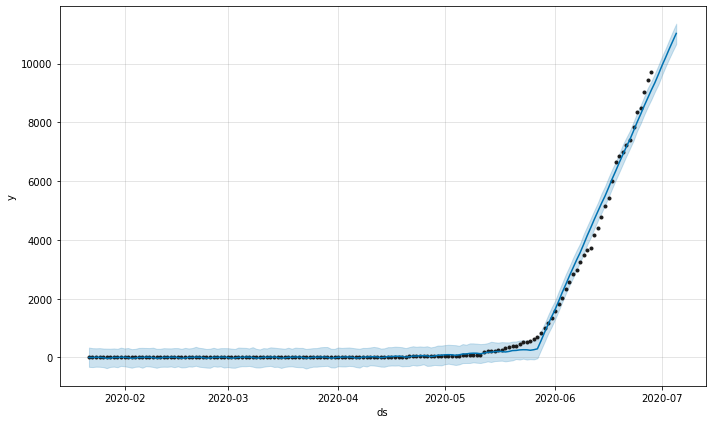

In [97]:
active_forecast_plot = m.plot(forecast)

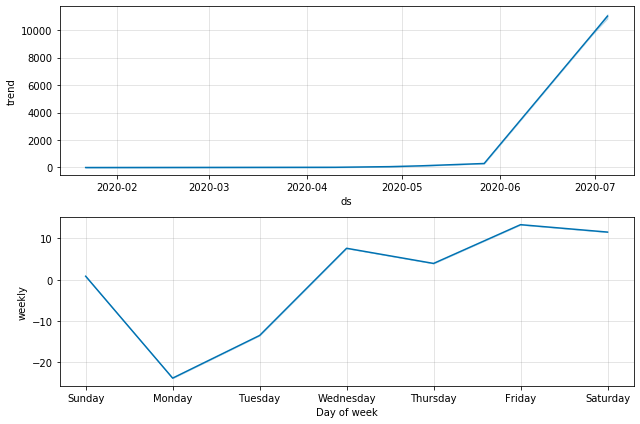

In [98]:
active_forecast_plot = m.plot_components(forecast)